In [2]:
# Pandas
from config import DB_USER, DB_PASS, DB_ENDPOINT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine

In [3]:
 # Create Engine
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_ENDPOINT}")
conn = engine.connect()

In [4]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM historical", conn, index_col="index")
data.head()

,crypto,time,open,high,low,close,volume,trade
index,,,,,,,,
0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700


In [5]:
ethereum_df = data[data["crypto"] == "ethereum_usdt"]
ethereum_df = ethereum_df.reset_index(drop=True)
ethereum_df

,crypto,time,open,high,low,close,volume,trade
0,ethereum_usdt,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,ethereum_usdt,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,ethereum_usdt,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,ethereum_usdt,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,ethereum_usdt,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...,...
1457,ethereum_usdt,1.637798e+09,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,ethereum_usdt,1.637885e+09,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,ethereum_usdt,1.637971e+09,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,ethereum_usdt,1.638058e+09,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [6]:
# drop the crypto column which is just a name
ethereum_df = ethereum_df.drop("crypto", axis=1)
ethereum_df

,time,open,high,low,close,volume,trade
0,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...
1457,1.637798e+09,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,1.637885e+09,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,1.637971e+09,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,1.638058e+09,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [7]:
ethereum_df["time"] = pd.to_datetime(ethereum_df['time'], unit="s")
ethereum_df

,time,open,high,low,close,volume,trade
0,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...
1457,2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,2021-11-28,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [8]:
# make the predictions 30 days in the future for the target.
projection = 30
ethereum_df["prediction"] = ethereum_df["close"].shift(-projection)
ethereum_df.head(35)

,time,open,high,low,close,volume,trade,prediction
0,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000,733.99000000
1,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000,681.06000000
2,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000,733.98000000
3,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000,754.99000000
4,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000,855.28000000
5,2017-12-04,460.30000000,470.98000000,445.00000000,466.67000000,23182.65949000,11708.14715000,934.03000000
6,2017-12-05,466.66000000,468.67000000,445.21000000,452.26000000,25387.11695000,12902.22244000,940.00000000
7,2017-12-06,452.26000000,455.10000000,400.00000000,411.01000000,38638.76036000,16000.21644000,959.30000000
8,2017-12-07,413.50000000,427.61000000,375.01000000,406.33000000,41343.73269000,17174.99356000,1004.11000000
9,2017-12-08,406.52000000,456.78000000,390.00000000,442.56000000,41064.60305000,17149.63290000,1123.09000000


In [9]:
ethereum_df = ethereum_df.set_index("time")
ethereum_df

,open,high,low,close,volume,trade,prediction
time,,,,,,,
2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000,733.99000000
2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000,681.06000000
2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000,733.98000000
2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000,754.99000000
2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000,855.28000000
...,...,...,...,...,...,...,...
2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000,NaN
2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000,NaN
2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000,NaN


In [10]:
#We have to drop nan values
ethereum_df = ethereum_df.dropna()

In [11]:
ethereum_df.dtypes

open          object
high          object
low           object
close         object
volume        object
trade         object
prediction    object
dtype: object

In [12]:
# convert to numerical
ethereum_df = ethereum_df.astype({"open": float, "high": float, "low":float, "close": float, "volume": float, "trade": float, "prediction": float})
ethereum_df.dtypes

open          float64
high          float64
low           float64
close         float64
volume        float64
trade         float64
prediction    float64
dtype: object

In [13]:
# remove the last 30 days from the data - we want to keep as unseen data / holdout
X = ethereum_df[:-projection]

In [14]:
# Set the features
X = X.drop("prediction", axis=1)
X

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17,515.00,385.00,421.70,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,427.43,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,457.51,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,457.63,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,460.30,24490.05997,12239.10293
...,...,...,...,...,...,...
2021-09-26,2921.84,3115.51,2738.17,3059.37,703594.47800,346152.90530
2021-09-27,3059.36,3164.94,2922.71,2925.59,510130.73190,249913.29030
2021-09-28,2924.76,2970.82,2789.00,2804.91,511325.46430,250476.15270


In [15]:
# remove the last 30 rows from the data we want to keep as unseen data / holdout
y = ethereum_df[:-projection]

In [16]:
# Set the target
y = y["prediction"]
y

time
2017-11-29     733.99
2017-11-30     681.06
2017-12-01     733.98
2017-12-02     754.99
2017-12-03     855.28
               ...   
2021-09-26    4131.52
2021-09-27    3922.00
2021-09-28    4286.02
2021-09-29    4418.89
2021-09-30    4322.68
Name: prediction, Length: 1402, dtype: float64

LR: -1.721614 (1.970621)
Lasso: -0.353506 (0.744661)
Ridge: -0.892755 (1.023370)
RF: -0.667775 (0.758204)
XGBOOST: -0.824312 (0.562262)
NN: 0.318014 (0.110191)
KNN: -6.341482 (5.785624)
SVR: -11.271765 (13.206510)


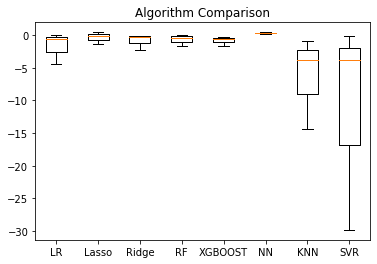

In [17]:
# perform cross validation
import warnings
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score


warnings.simplefilter("ignore")

models = []
models.append(('LR', LinearRegression(normalize=True)))
models.append(('Lasso', Lasso(normalize=True))) 
models.append(('Ridge', Ridge(normalize=True))) 
models.append(('RF', RandomForestRegressor(n_estimators = 200)))
models.append(('XGBOOST', XGBRegressor(n_estimators = 200, verbosity = 0)))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=3)
    cv_results = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [18]:
# We need to set our training and testing data.
# We want all of the data except the last 30 days to train on, and we will test on the last 30 days

#keep all but last 30 days for train taking care not to include the holdout data
X_train = ethereum_df[:-30]
X_train = X_train[:-projection]
#remove last 30 days we want to keep as test data and drop our label which is the prediction column
X_train = X_train.drop("prediction",axis=1)
print(X_train)

# keep all but last 30 days for train
y_train = ethereum_df[:-30]
y_train = y_train[:-projection]
y_train = y_train["prediction"]
y_train

               open     high      low    close        volume         trade
time                                                                      
2017-11-29   466.17   515.00   385.00   421.70   51313.49571   23825.39377
2017-11-30   421.92   460.00   387.01   427.43   45184.22265   24018.42012
2017-12-01   428.05   465.97   413.74   457.51   33072.21995   19043.24922
2017-12-02   457.53   471.91   445.00   457.63   25796.14000   12336.59141
2017-12-03   457.31   485.90   440.11   460.30   24490.05997   12239.10293
...             ...      ...      ...      ...           ...           ...
2021-08-27  3093.06  3280.00  3060.18  3273.45  451027.80711  231317.47040
2021-08-28  3273.89  3287.00  3210.31  3244.48  262360.34921  128912.53425
2021-08-29  3244.75  3285.00  3152.34  3223.47  335806.78270  168361.75310
2021-08-30  3223.47  3347.95  3143.00  3229.64  625347.27541  317195.90286
2021-08-31  3229.14  3476.00  3188.77  3429.20  863071.13092  431197.75023

[1372 rows x 6 columns]


time
2017-11-29     733.99
2017-11-30     681.06
2017-12-01     733.98
2017-12-02     754.99
2017-12-03     855.28
               ...   
2021-08-27    3059.37
2021-08-28    2925.59
2021-08-29    2804.91
2021-08-30    2850.45
2021-08-31    3000.61
Name: prediction, Length: 1372, dtype: float64

In [19]:
# Our testing set will be the last 30 days excluding the holdout.
X_test = ethereum_df[-60:]
X_test = X_test[:-projection]
X_test = X_test.drop("prediction", axis=1)
print(X_test)

y_test = ethereum_df[-60:]
y_test = y_test[:-projection]
y_test = y_test["prediction"]
y_test

               open     high      low    close        volume         trade
time                                                                      
2021-09-01  3429.19  3842.00  3382.22  3826.82  8.457600e+05  445083.48573
2021-09-02  3826.82  3836.80  3717.04  3785.82  5.251658e+05  255406.36110
2021-09-03  3785.82  4027.88  3705.05  3938.11  6.559038e+05  334965.95109
2021-09-04  3938.11  3970.00  3832.50  3885.52  3.644781e+05  176186.70340
2021-09-05  3885.61  3980.00  3830.00  3950.29  3.657599e+05  187163.42260
2021-09-06  3950.28  3970.00  3864.30  3926.77  3.977686e+05  199177.05470
2021-09-07  3926.67  3947.15  3005.00  3434.57  1.203536e+06  567117.08258
2021-09-08  3434.84  3560.00  3215.16  3499.00  7.806118e+05  385803.02140
2021-09-09  3499.01  3567.06  3390.40  3424.93  6.285539e+05  313804.09190
2021-09-10  3424.94  3514.11  3150.00  3208.86  6.330263e+05  312620.07730
2021-09-11  3208.85  3348.37  3200.00  3267.21  4.135242e+05  207506.73780
2021-09-12  3267.10  3474

time
2021-09-01    3309.91
2021-09-02    3387.76
2021-09-03    3417.73
2021-09-04    3386.31
2021-09-05    3515.27
2021-09-06    3574.89
2021-09-07    3587.47
2021-09-08    3563.13
2021-09-09    3574.82
2021-09-10    3414.22
2021-09-11    3542.12
2021-09-12    3491.46
2021-09-13    3607.42
2021-09-14    3790.82
2021-09-15    3868.99
2021-09-16    3829.96
2021-09-17    3846.85
2021-09-18    3744.96
2021-09-19    3877.03
2021-09-20    4161.15
2021-09-21    4052.99
2021-09-22    3972.20
2021-09-23    4167.12
2021-09-24    4082.33
2021-09-25    4220.37
2021-09-26    4131.52
2021-09-27    3922.00
2021-09-28    4286.02
2021-09-29    4418.89
2021-09-30    4322.68
Name: prediction, dtype: float64

In [20]:
# initialize model with SCALING enabled
model = LinearRegression(normalize=True)

model.fit(X_train, y_train)
print(model.score(X_test,y_test))

-5.12893010582471


In [21]:
predictions = model.predict(X_test)
data = pd.DataFrame()
data["actual"] = y_test
data["predictions"] = predictions
data["difference ($)"] = data["predictions"] - data["actual"]
data["difference (%)"] = data["difference ($)"] / data["actual"] *100
data

,actual,predictions,difference ($),difference (%)
time,,,,
2021-09-01,3309.91,3674.130345,364.220345,11.003935
2021-09-02,3387.76,4266.510006,878.750006,25.938969
2021-09-03,3417.73,4048.044012,630.314012,18.442475
2021-09-04,3386.31,4319.176396,932.866396,27.548169
2021-09-05,3515.27,4340.902367,825.632367,23.487026
2021-09-06,3574.89,4422.946987,848.056987,23.722604
2021-09-07,3587.47,2988.850923,-598.619077,-16.686386
2021-09-08,3563.13,3634.844033,71.714033,2.012670
2021-09-09,3574.82,3738.737944,163.917944,4.585348


In [22]:
print(data["difference (%)"].mean())

-6.781092256433824


<AxesSubplot:xlabel='time'>

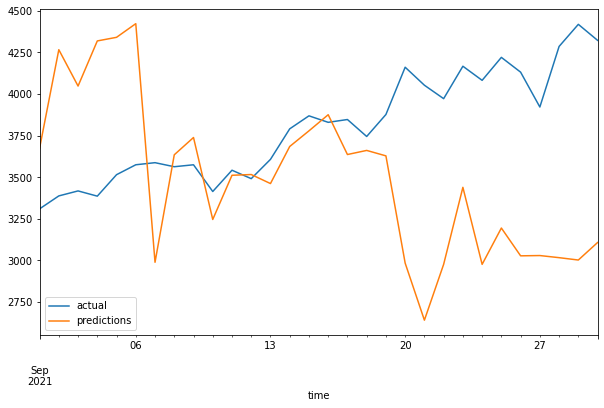

In [23]:
#plot chart
data.plot(y=["actual", "predictions"], figsize=(10,6))

In [24]:
data = pd.DataFrame()
data["scores"] = model.coef_
data["features"] = ethereum_df.drop("prediction",axis=1).columns.tolist()
data

,scores,features
0,0.837911,open
1,-2.064915,high
2,1.038221,low
3,1.343050,close
4,0.000034,volume
5,0.000176,trade


<AxesSubplot:xlabel='features'>

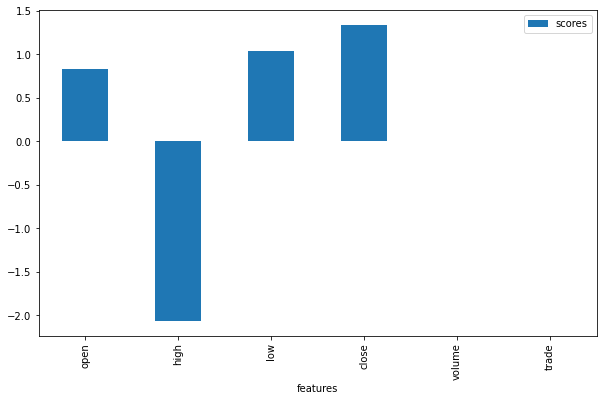

In [25]:
data.plot(kind="bar", x="features", y="scores", figsize=(10,6))

In [29]:
# now lets try it on the data we reserved
unseen_data = ethereum_df[-30:]
actual_values = unseen_data["prediction"]
unseen_data = unseen_data.drop("prediction", axis=1)
unseen_data

,open,high,low,close,volume,trade
time,,,,,,
2021-10-01,3000.62,3330.00,2969.07,3309.91,648714.61510,336578.17690
2021-10-02,3309.91,3469.00,3257.00,3387.76,422551.18110,215469.09750
2021-10-03,3387.77,3488.00,3342.51,3417.73,360586.89050,183173.92820
2021-10-04,3417.73,3437.19,3270.00,3386.31,485204.64200,234726.45740
2021-10-05,3386.31,3545.00,3363.78,3515.27,393900.88180,198949.77870
2021-10-06,3515.48,3632.11,3342.00,3574.89,618265.54020,309931.14560
2021-10-07,3574.88,3653.98,3470.80,3587.47,486102.35910,243095.03090
2021-10-08,3587.47,3695.00,3532.00,3563.13,403597.14370,199496.51730
2021-10-09,3563.13,3635.00,3538.07,3574.82,361906.75140,181998.68950


In [30]:
pred = model.predict(unseen_data)

In [31]:
data = pd.DataFrame()
data["actual"] = actual_values
data["predicted"] = pred
data

,actual,predicted
time,,
2021-10-01,4287.21,3223.407093
2021-10-02,4319.43,3570.161729
2021-10-03,4589.89,3717.443202
2021-10-04,4603.35,3743.226426
2021-10-05,4532.32,3755.493909
2021-10-06,4474.24,3768.343587
2021-10-07,4518.00,3907.394485
2021-10-08,4612.59,3853.660350
2021-10-09,4807.98,3974.688843


<AxesSubplot:xlabel='time'>

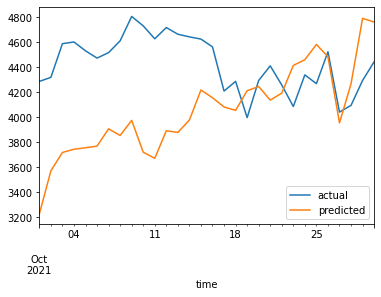

In [32]:
data.plot()

In [33]:
#r2 score on unseen
from sklearn.metrics import r2_score
pred_unseen = model.predict(unseen_data)
r2_score(actual_values, pred_unseen)

-6.671190835849411